<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Описание-данных" data-toc-modified-id="1.-Описание-данных-1">1. Описание данных</a></span></li><li><span><a href="#2.-Ознакомление-с-данными" data-toc-modified-id="2.-Ознакомление-с-данными-2">2. Ознакомление с данными</a></span></li><li><span><a href="#3.-Подготовка-данных" data-toc-modified-id="3.-Подготовка-данных-3">3. Подготовка данных</a></span></li><li><span><a href="#4.-Визуализация" data-toc-modified-id="4.-Визуализация-4">4. Визуализация</a></span><ul class="toc-item"><li><span><a href="#4.1.-Модели-самолётов-и-количество-рейсов" data-toc-modified-id="4.1.-Модели-самолётов-и-количество-рейсов-4.1">4.1. Модели самолётов и количество рейсов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.2">Вывод</a></span></li><li><span><a href="#4.2.-Города-и-количество-рейсов" data-toc-modified-id="4.2.-Города-и-количество-рейсов-4.3">4.2. Города и количество рейсов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4">Вывод</a></span></li><li><span><a href="#4.3.-Топ-10-городов-и-количество-рейсов" data-toc-modified-id="4.3.-Топ-10-городов-и-количество-рейсов-4.5">4.3. Топ-10 городов и количество рейсов</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.6">Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5">Общий вывод</a></span></li></ul></div>

# Анализ перелетов по моделям самолетов за определенный период.

## 1. Описание данных

**/datasets/query_1.csv** — результат первого запроса. В нём содержится информация о:

- model — модели самолета
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

**/datasets/query_3.csv** — результат третьего запроса. В нём содержится информация о:

- city — городах
- average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

Для этих двух наборов данных нужно:
- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.

## 2. Ознакомление с данными

Импорт библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Читаем файлы:

In [2]:
model_flights = pd.read_csv('/datasets/query_1.csv')
city_flights = pd.read_csv('/datasets/query_3.csv')

Смотрим как всё подгрузилось:

In [3]:
model_flights

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
model_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


Данные подгрузились корректно. Тип данных менять не будем.

In [5]:
city_flights

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [6]:
city_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Данные подкрузились корректно. Тип данных поменяем на float32 - так будет немного проще.

## 3. Подготовка данных

Меняем тип данных:

In [7]:
city_flights['average_flights'] = city_flights['average_flights'].astype('float32')

Посмотрим как распределились данные в таблице.

In [8]:
city_flights.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119791
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774200


Проверим на наличие дублей.

In [9]:
city_flights.duplicated().sum()

0

Сохраним в переменную топ-10 городов по количеству рейсов:

In [10]:
top_city_flights = (city_flights.sort_values(by='average_flights', ascending=False)
                    .head(10).reset_index(drop=True))
top_city_flights

,city,average_flights
0,Москва,129.774200
1,Санкт-Петербург,31.161291
2,Новосибирск,17.322580
3,Красноярск,11.580646
4,Екатеринбург,11.322580
5,Ростов-на-Дону,10.193548
6,Пермь,10.129032
7,Брянск,10.000000
8,Сочи,9.612904
9,Ульяновск,9.580646


## 4. Визуализация

### 4.1. Модели самолётов и количество рейсов

In [11]:
(model_flights.sort_values(by='flights_amount', ascending=False)
 .style.bar(subset=['flights_amount'], color='peru'))

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


Сделаем график побольше:

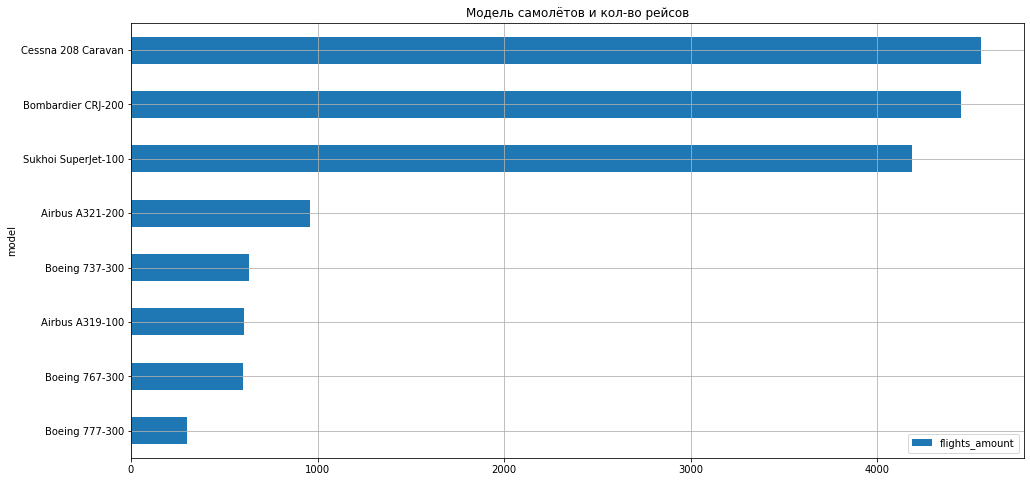

In [12]:
model_flights.sort_values(by='flights_amount').plot(kind='barh', x='model', figsize=(16,8))
plt.title('Модель самолётов и кол-во рейсов')
plt.grid(True)
plt.show()

**Cessna 208 Caravan** имеет вместимость до 13 пассажиров (зависит от модификации). Используется на авиалиниях малой протяжённости для пассажирских, грузопассажирских, грузовых перевозок частного и военного назначения. Т.е. это не рейсовый самолёт.

Остальные самолёты являются межрегиональными, либо: ближне, средне дальнемагистрального назначения, что используется в пассажироперевозках.

Самыми популярными самолётам в пассажироперевозках являются: 
- **Bombardier CRJ-200** на 50 мест.
- **Sukhoi SuperJet-100** на 108 мест.

Остальные самолёты летают реже, рассчитаны на более длительные дистанции и вместимость их значительно больше, например в **Boeing 777-300** - 407 мест.

### Вывод

Наиболее популярные модели это ближнемагистральные или межрегиональные самолёты относительно небольшой вместимости пассажиров (до 108 мест).

### 4.2. Города и количество рейсов

In [13]:
(city_flights.sort_values(by='average_flights', ascending=False)
 .style.bar(subset=['average_flights'], color='peru'))

,city,average_flights
43,Москва,129.774
70,Санкт-Петербург,31.1613
54,Новосибирск,17.3226
33,Красноярск,11.5806
20,Екатеринбург,11.3226
67,Ростов-на-Дону,10.1935
63,Пермь,10.129
10,Брянск,10
74,Сочи,9.6129
84,Ульяновск,9.58065


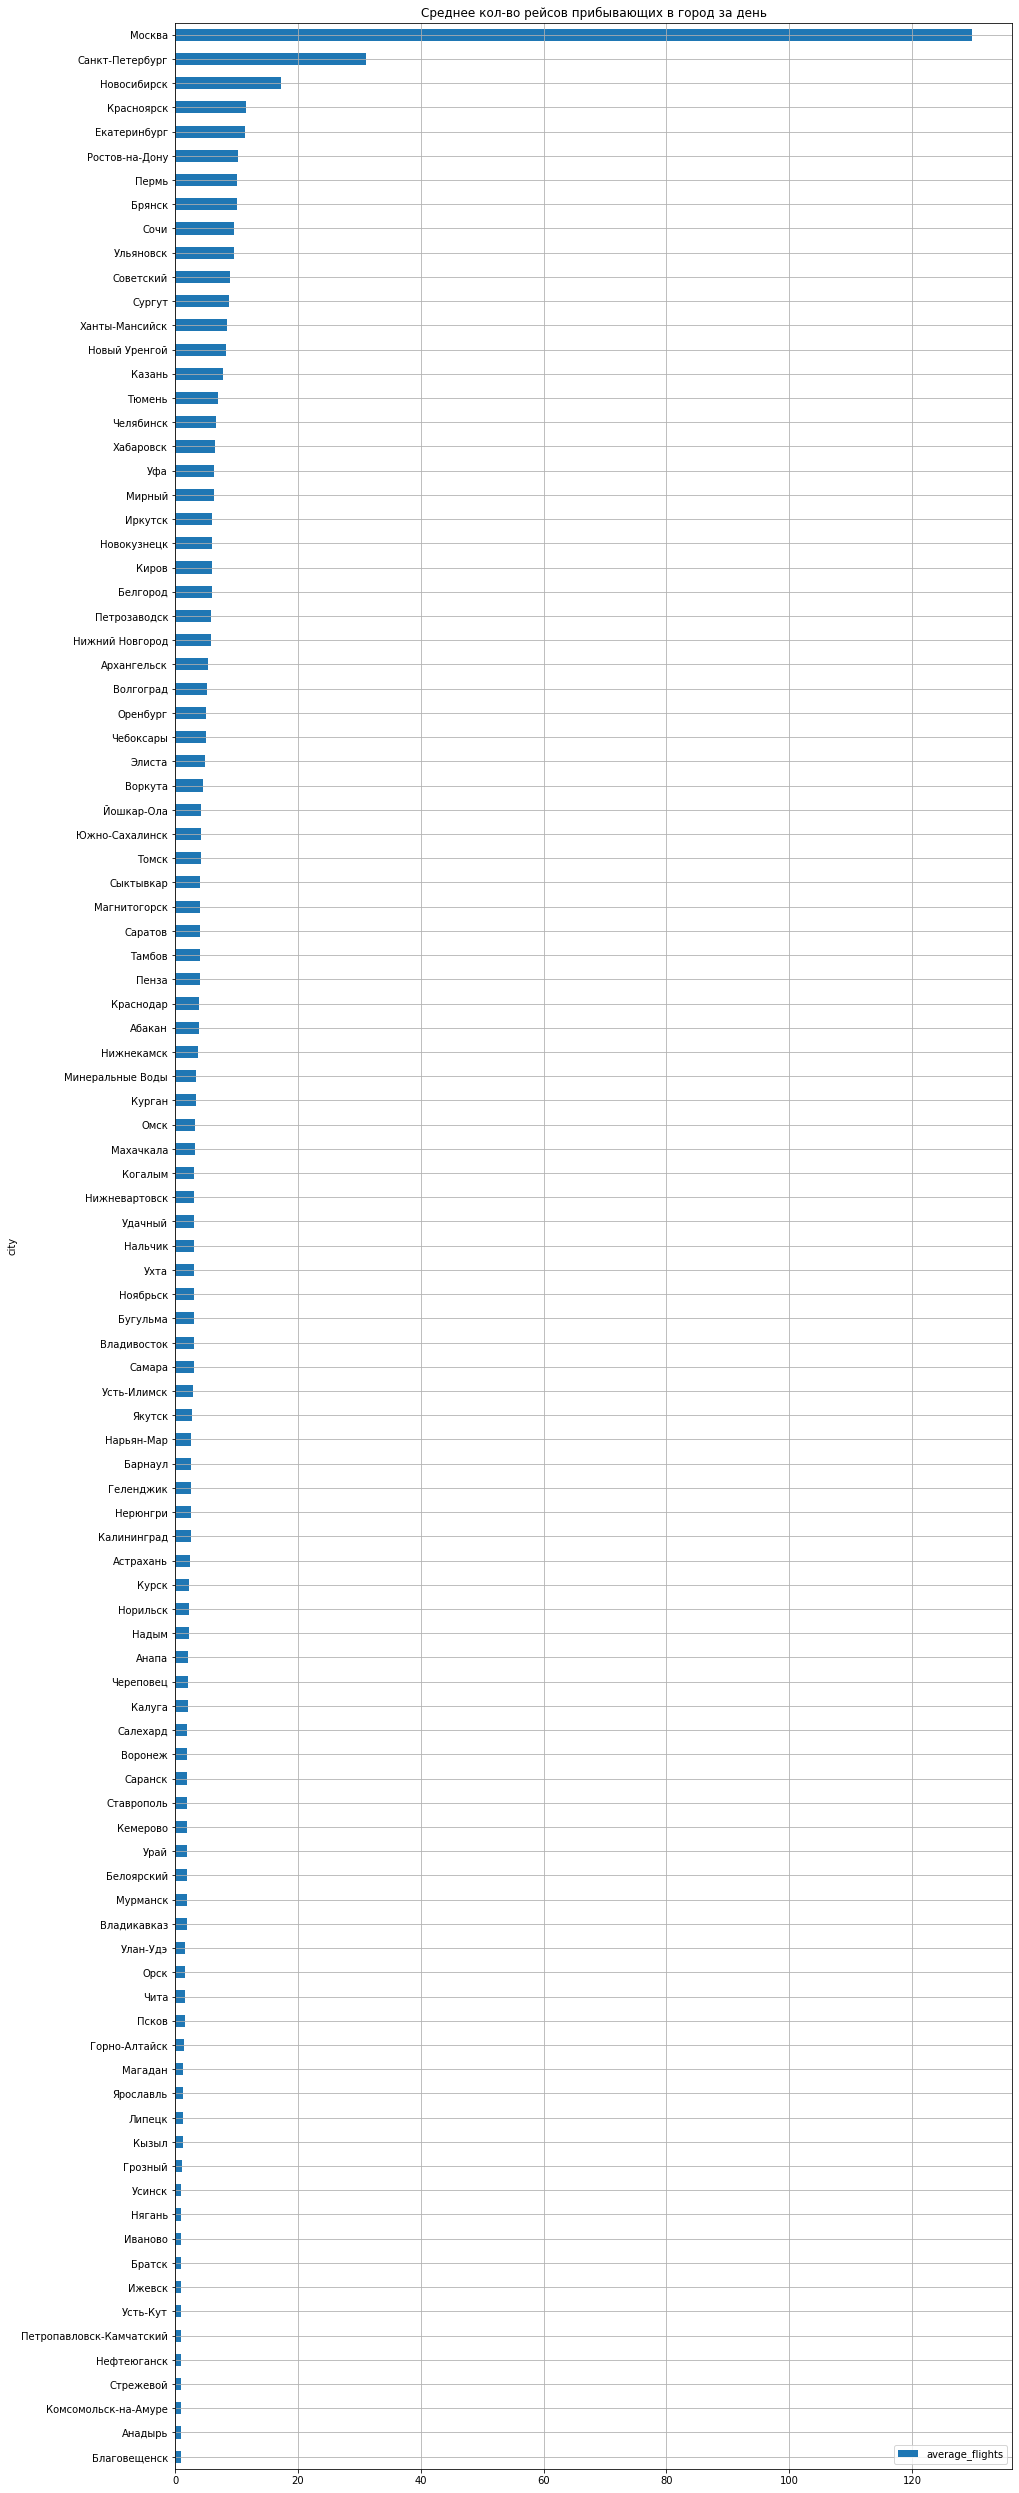

In [14]:
city_flights.sort_values(by='average_flights').plot(kind='barh', x='city', figsize=(15, 45))
plt.title('Среднее кол-во рейсов прибывающих в город за день')
plt.grid(True)
plt.show()

**Москва** заняла лидирующую позицию с очень большим отрывом от других городов. Оно и понятно - 5 пассажирских аэропортов обслуживают столицу. К тому же, из московскоих аэропортов легко ежедневно набирается полный самолет в любом направлении, так как город самый большой по численности населения.

В **Санкт-Петербурге** и **Новосибирске** такая же ситуация - это наиболее крупные города по численности населения.

###  Вывод

В основном количество рейсов зависит от количества населения в городе.

### 4.3. Топ-10 городов и количество рейсов

In [15]:
(top_city_flights.sort_values(by='average_flights', ascending=False)
 .style.bar(subset=['average_flights'], color='peru'))

,city,average_flights
0,Москва,129.774
1,Санкт-Петербург,31.1613
2,Новосибирск,17.3226
3,Красноярск,11.5806
4,Екатеринбург,11.3226
5,Ростов-на-Дону,10.1935
6,Пермь,10.129
7,Брянск,10
8,Сочи,9.6129
9,Ульяновск,9.58065


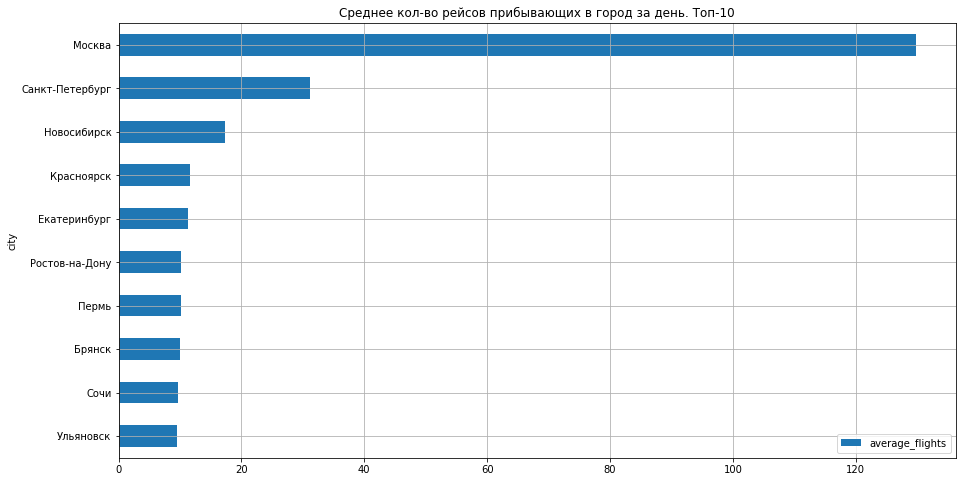

In [16]:
top_city_flights.sort_values(by='average_flights').plot(kind='barh', x='city', figsize=(15, 8))
plt.title('Среднее кол-во рейсов прибывающих в город за день. Топ-10')
plt.grid(True)
plt.show()

В топ-10 вошли города миллионники, либо города расположенные ближе к южной и западной части России.

### Вывод

Количество рейсов зависит не только от количества населения города, но и от расположения самих городов. 

## Общий вывод

Мы изучили данные по количеству рейсов для каждой модели самолетов в сентябре 2018 года. Наиболее популярными оказали модели меньшей вместимостью пассажиров.

Колличество рейсов зависит от количества населения и расположения города. 